# Waited least square
example form lecture pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\ ' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return ''.join(rv)

# Fitt the data.
Find the best parabola that fits the four data points. Consider
the first and the fourth one 5 times more important than the
other two.\\
$$ (−1, 1), (0, 0), (1, 0), (2, −2) $$

$$ p(-1)= 1a + (-1)b + (-1)^2c = 1$$\\
$$ p(0) = 1a + 0b + 0^2c = 0$$ \\
$$ p(1) = 1a + 1b + 1^2c = 0$$\\
$$ p(2) = 1a + 2b + 2^2c = −2 $$\\

In [2]:
datax = [-1, 0, 1, 2]
datay = [1, 0, 0, -2]

In [3]:
A = np.matrix([[1, -1 , 1],
               [1,  0 , 0],
               [1,  1 , 1],
               [1,  2,  4]])
y = np.matrix([[1],
               [0],
               [0],
               [-2]])

Then the waited matrix is.

In [4]:
W = np.matrix([[5, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 5]])

In [5]:
ATWA = np.transpose(A)*W*A
ATWy = np.transpose(A)*W*y
print("A^T*W*A = A^T*W*y gives:")
print(str(ATWA))
print(str(ATWy))

A^T*W*A = A^T*W*y gives:
[[12  6 26]
 [ 6 26 36]
 [26 36 86]]
[[ -5]
 [-25]
 [-35]]


Solving this with gause jordan elemination geves \\
$ a=0.4891,\quad b=-0.7283,\quad c=-0.25 $\\
Thus the fitted line is:\\
$ p(x) = 0.4891 - 0.7283x - 0.25x^2 $

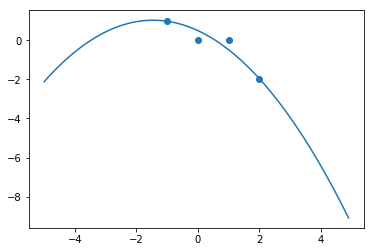

In [6]:
#plot
%matplotlib inline
x=np.arange(-5,5,0.1)
fig=plt.figure()
plt.scatter(datax,datay)
px = 0.4891 - 0.7283*x - 0.25*x**2
plt.plot(x,px)

# Assigment 2 part 1.1.b

In [7]:
datax = [ -1, 2, 4, 5, 7]
datay = [ 0, 2, 1, -1, -3]

fit the data to $ p(x) = a + bx + cx^2 $

$$ p(-1) = 1a + (-1)b + (-1)^2c = 0 $$
$$ p(2) = 1a + (2)b + (2)^2c = 2 $$
$$ p(4) = 1a + (4)b + (4)^2c = 1 $$
$$ p(5) = 1a + (5)b + (5)^2c = -1$$
$$ p(7) = 1a + (7)b + (7)^2c = -3$$

In [8]:
A = np.matrix([[1, -1 , 1],
               [1, 2, 2**2],
               [1, 4, 4**2],
               [1, 5, 5**2],
               [1, 7, 7**2]])
y = np.matrix([[0],
               [2],
               [1],
               [-1],
               [-3]])

The waited matrix is

In [9]:
W = np.matrix([[1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 0, 0, 0, 1/5]])

#print(bmatrix(W))
#print(bmatrix(np.transpose(A)))
#print(bmatrix(A))
ATWA = np.transpose(A)*W*A
ATWy = np.transpose(A)*W*y
print("A^T*W*A = A^T*W*y gives:")
print(bmatrix(ATWA))
print(bmatrix(y))
print(bmatrix(ATWy))

A^T*W*A = A^T*W*y gives:
\begin{bmatrix}  4.2 & 11.4 & 55.8\\   11.4 & 55.8 & 264.6\\   55.8 & 264.6 & 1378.2\\ \end{bmatrix}
\begin{bmatrix}  0\\   2\\   1\\   -1\\   -3\\ \end{bmatrix}
\begin{bmatrix}  1.4\\   -1.2\\   -30.4\\ \end{bmatrix}


Gause jordan gives $ p(x) = 1.0798 + 0.7790x - 0.2153x^2 $

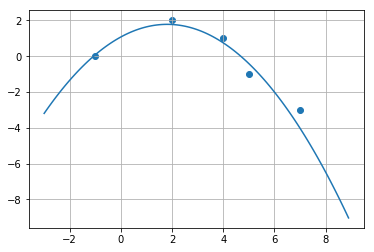

In [10]:
#plot
%matplotlib inline
x=np.arange(-3,9,0.1)
fig=plt.figure()
plt.scatter(datax,datay)
px = 1.0798 + 0.7790*x - 0.2153*x**2
plt.plot(x,px)
plt.grid()
plt.savefig("graf2.svg")

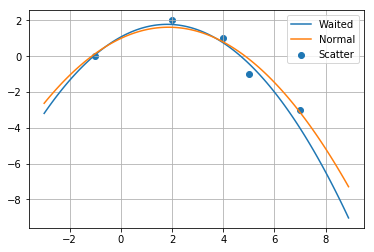

In [139]:
# plotting both curves in the same graph.
pxa = -0.18*x**2 + 0.67*x + 1
plt.scatter(datax,datay, label='Scatter')
px = 1.0798 + 0.7790*x - 0.2153*x**2
plt.plot(x,px, label='Waited')
plt.plot(x,pxa, label='Normal')
plt.legend()
plt.grid()
plt.savefig("quadratic_plot.jpg")

# Exponential fitt of data points.

In [24]:
# The data points.
from sympy import *

data = Matrix([[-1,2,4,5,7],
               [7,6,5,3,1]])

#latex(data)
temp = data.tolist()
temp[0]

[-1, 2, 4, 5, 7]

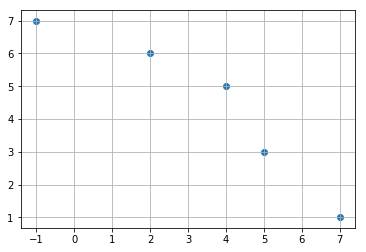

In [27]:
# Plot a scatter of the data
plt.scatter(temp[0], temp[1])
plt.grid()

In [29]:
# function to fitt against 
q = symbols('q')
b = symbols('b')

In [33]:
f1 = lambda x: q + b*x**2

In [36]:
for i in temp[0]:
    print(str(f1(i)))

b + q
4*b + q
16*b + q
25*b + q
49*b + q


In [116]:
A = Matrix([[1,1],[1,4],[1,4**2],[1, 5**2], [1, 7**2]])
y = []
for i in temp[1]:
    y.append(ln(i))
   
y = Matrix(y)
#latex(y)
print(str(A))
print(str(y))

Matrix([[1, 1], [1, 4], [1, 16], [1, 25], [1, 49]])
Matrix([[1.94591014905531], [1.79175946922805], [1.60943791243410], [1.09861228866811], [0]])


In [117]:
AtA = transpose(A)*A
print(str(latex(AtA)))
print(str(AtA))

\left[\begin{matrix}5 & 95\\95 & 3299\end{matrix}\right]
Matrix([[5, 95], [95, 3299]])


In [56]:
Aty = transpose(A)*y
print(str(latex(Aty, mat_str = "bmatrix")))

\left[\begin{bmatrix}\log{\left (3 \right )} + \log{\left (5 \right )} + \log{\left (6 \right )} + \log{\left (7 \right )}\\\log{\left (7 \right )} + 4 \log{\left (6 \right )} + 16 \log{\left (5 \right )} + 25 \log{\left (3 \right )}\end{bmatrix}\right]


In [67]:
print(str(AtA))
print(str(Aty))
#togaus = [AtA.tolist()[0], Aty.tolist()[0]]
#togaus
AtA.tolist()[0][]

Matrix([[5, 95], [95, 3299]])
Matrix([[log(3) + log(5) + log(6) + log(7)], [log(7) + 4*log(6) + 16*log(5) + 25*log(3)]])


[5, 95]

In [93]:
# newlist = [s.upper() for s in oldlist]
gausas = Matrix([[5, 95, log(3) + log(5) + log(6) + log(7)],
                 [95, 3299, log(7) + 4*log(6) + 16*log(5) + 25*log(3)]])

t = gausas.rref()
print(str(latex(gausas)) + "\n\n")
print(str(latex(t[0], )))
#print(str(latex(t[0], mat_str="bmatrx")))

\left[\begin{matrix}5 & 95 & \log{\left (3 \right )} + \log{\left (5 \right )} + \log{\left (6 \right )} + \log{\left (7 \right )}\\95 & 3299 & \log{\left (7 \right )} + 4 \log{\left (6 \right )} + 16 \log{\left (5 \right )} + 25 \log{\left (3 \right )}\end{matrix}\right]


\left[\begin{matrix}1 & 0 & \frac{154}{1245} \log{\left (3 \right )} + \frac{593}{2490} \log{\left (5 \right )} + \frac{973}{2490} \log{\left (6 \right )} + \frac{178}{415} \log{\left (7 \right )}\\0 & 1 & - \frac{1}{83} \log{\left (7 \right )} - \frac{5}{498} \log{\left (6 \right )} - \frac{1}{498} \log{\left (5 \right )} + \frac{1}{249} \log{\left (3 \right )}\end{matrix}\right]


In [101]:
# so the redused was to big to fitt on the paper.
bla = t[0]
print(str(latex(bla.evalf())))

\left[\begin{matrix}1.0 & 0 & 2.0539691846318\\0 & 1.0 & -0.0402539589870884\end{matrix}\right]


In [140]:
from mpmath import *
e = mp.e
print(e)
#f = lambda x: ln(2.0539691846318) + (-0.0402539589870884*x**2)
#f = lambda x: 2.053*e**(-0.04*x**2)
#f = lambda x: 2.053*e**(-0.04*x**2)
f = lambda x: (e**2.053)*e**(-0.04*x**2)
#f = lambda x:-0.0402539589870884* e **(2.0539691846318*x**2)
print(str(f(2)))

2.71828182845905
6.63925660405478


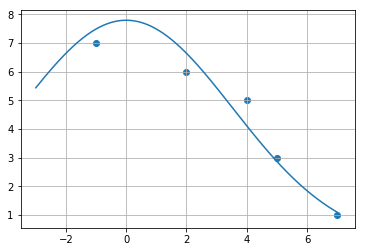

In [143]:
# Plot of f(x) and data points
import numpy as np
xlin = np.arange(-3,7,0.01)
plt.plot(xlin, f(xlin))
plt.scatter(temp[0], temp[1])
plt.grid()
plt.savefig("exponential_plot.jpg")

# Principal component analysis

In [207]:
# given data.
A = transpose(Matrix([[-4,2],
                      [-3,1],
                      [-1,0],
                      [1,0] ,
                      [3,-1],
                      [4,-2]]))
M = Matrix([[10.4, -4.4],
            [-4.4, 2.0]])
egin=[]
egin.append([12.28,Matrix([[-0.92],[0.39]])])
egin.append([0.12, Matrix([[-0.92],[-0.39]])])
print(str(egin))

[[12.28, Matrix([
[-0.92],
[ 0.39]])], [0.12, Matrix([
[-0.92],
[-0.39]])]]


In [172]:
# Convert A to a list so it can be indexed.
tempA = A.tolist()
print(str(tempA[0]))
print(str(tempA[1]))

[-4, -3, -1, 1, 3, 4]
[2, 1, 0, 0, -1, -2]


[[-0.920000000000000], [0.390000000000000]]


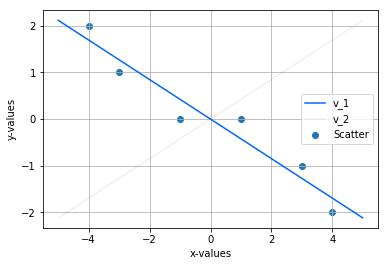

In [243]:
# Polott of A
vector1 = egin[0][1].tolist()
vector2 = egin[1][1].tolist()
print(str(vector1))
plt.scatter(tempA[0],tempA[1], label='Scatter')
# Line 
xline = np.arange(-5,5,0.01)
eginLine1 = xline*vector1[1]/vector1[0]
eginLine2 = xline*vector2[1]/vector2[0]
plt.plot(xline,eginLine1, color='#0066ff', label='v_1')
plt.plot(xline,eginLine2, color='#0F0F0F0F', label='v_2')
plt.legend()
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.grid()
plt.savefig('pca_orginal.jpg')

In [174]:
# mean value of the x and y asxis
xmean = 0
for i in tempA[0]:
    xmean += i

ymean = 0
for i in tempA[1]:
    ymean += i
    
print("xmean=" + str(xmean) + " ymean=" + str(ymean))
print("Medelvardet var tydligen 0")

xmean=0 ymean=0
Medelvardet var tydligen 0


# Deriving the new data set.
$$ finaldata = RowFetureVectro * RowData $$
Wher rowFetureVector is an transposed eginvector colum matrix.
RowData is our A matrix but i dont know if it also have to be transposed or not.
Do som experimenting.

In [198]:
#egin[0][1].tolist()[0][0]
#RFV = transpose(Matrix([egin[0][1].tolist()[0][0],egin[1][1].tolist()]))
col1 = egin[0][1].tolist()
col2 = egin[1][1].tolist()
RFV = Matrix([[col1[0][0], col2[0][0]],
       [col1[1][0], col2[1][0]]])
RFV

Matrix([
[-0.92, -0.92],
[ 0.39, -0.39]])

In [200]:
fin = RFV*A

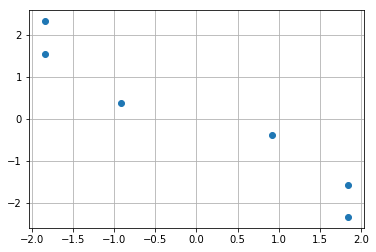

In [202]:
# plot fin.
fitTemp = fin.tolist()
plt.scatter(fitTemp[0],fitTemp[1])
plt.grid()

In [205]:
print(str(fin))

Matrix([[1.84000000000000, 1.84000000000000, 0.920000000000000, -0.920000000000000, -1.84000000000000, -1.84000000000000], [-2.34000000000000, -1.56000000000000, -0.390000000000000, 0.390000000000000, 1.56000000000000, 2.34000000000000]])


In [260]:
eginvector1 = egin[0][1]
print(str(eginvector1))
TL = transpose(A)*eginvector1
print(str(latex(TL)))
XL = TL*transpose(eginvector1)
print(str(latex(XL)))

Matrix([[-0.920000000000000], [0.390000000000000]])
\left[\begin{matrix}4.46\\3.15\\0.92\\-0.92\\-3.15\\-4.46\end{matrix}\right]
\left[\begin{matrix}-4.1032 & 1.7394\\-2.898 & 1.2285\\-0.8464 & 0.3588\\0.8464 & -0.3588\\2.898 & -1.2285\\4.1032 & -1.7394\end{matrix}\right]


[[-0.920000000000000], [0.390000000000000]]
[[-4.10320000000000, 1.73940000000000], [-2.89800000000000, 1.22850000000000], [-0.846400000000000, 0.358800000000000], [0.846400000000000, -0.358800000000000], [2.89800000000000, -1.22850000000000], [4.10320000000000, -1.73940000000000]]


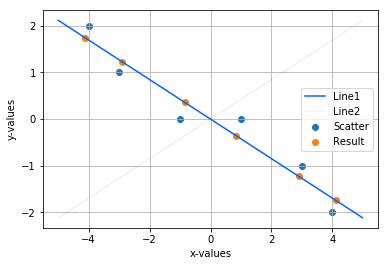

In [255]:
# Polott of A
vector1 = egin[0][1].tolist()
vector2 = egin[1][1].tolist()
print(str(vector1))
plt.scatter(tempA[0],tempA[1], label='Scatter')
# Line 
xline = np.arange(-5,5,0.01)
eginLine1 = xline*vector1[1]/vector1[0]
eginLine2 = xline*vector2[1]/vector2[0]
#print("eginline1=\n" + str(latex(eginLine1)) + "\neginline2=\n" + str(latex(eginLine2)))
plt.plot(xline,eginLine1, color='#0066ff', label='Line1')
plt.plot(xline,eginLine2, color='#0F0F0F0F', label='Line2')

#plt.plot(XL.tolist()[0],XL.tolist()[1])
print(str(XL.tolist()))
temp = transpose(XL).tolist()
plt.scatter(temp[0],temp[1], label='Result')


plt.legend()
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.grid()
plt.savefig('pca_result.jpg')